In [1]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Movie_Recommendation_System").getOrCreate()
sc = spark.sparkContext
sc

<SparkContext master=local[*] appName=Movie_Recommendation_System>

In [2]:
import socket
import platform

# Get computer name
computer_name = socket.gethostname()

# Get IP address
ip_address = socket.gethostbyname(computer_name)

# Get computer configuration
computer_config = platform.uname()

print(f"Computer Name: {computer_name}")
print(f"IP Address: {ip_address}")
print(f"Computer Configuration: {computer_config}")

Computer Name: MSI
IP Address: 192.168.1.13
Computer Configuration: uname_result(system='Windows', node='MSI', release='10', version='10.0.19041', machine='AMD64', processor='Intel64 Family 6 Model 141 Stepping 1, GenuineIntel')


In [3]:
movie_data = sc.textFile("movies.txt")
movie_data.first()
movie_data.take(5)

['tt0040761,Scott of the Antarctic,"[\'Action\', \'Adventure\', \'Biography\']",1948',
 'tt0076788,Sweeney!,"[\'Action\', \'Crime\', \'Drama\']",1977',
 'tt0066417,Street of a Thousand Pleasures,"[\'Action\', \'Adventure\']",1972',
 'tt0079639,The North Avenue Irregulars,"[\'Action\', \'Comedy\', \'Crime\']",1979',
 'tt0374273,The Tesseract,"[\'Action\', \'Crime\', \'Drama\']",2003']

In [4]:
num_movies = movie_data.count()
print("Number of movies: ", num_movies)

Number of movies:  6437


In [5]:
years = movie_data.map(lambda x: x.split(",")[-1])
print("Years: ", years.take(10))

Years:  ['1948', '1977', '1972', '1979', '2003', '2008', '2007', '1986', '1941', '2007']


In [6]:
years = years.filter(lambda x: x.isdigit())
movie_age = years.map(lambda x: 2024 - int(x)).countByValue()
print("Movie Age: ", movie_age)
values = list(movie_age.values())
bins = list(movie_age.keys())
print("Values: ", values)
print("Bins: ", bins)

Movie Age:  defaultdict(<class 'int'>, {76: 8, 47: 44, 52: 40, 45: 52, 21: 97, 16: 123, 17: 113, 38: 83, 83: 5, 20: 108, 23: 107, 80: 9, 33: 87, 3: 102, 36: 99, 40: 66, 29: 115, 32: 68, 28: 77, 15: 154, 8: 256, 30: 95, 50: 59, 7: 272, 11: 181, 6: 271, 26: 80, 58: 30, 62: 11, 22: 100, 43: 46, 73: 16, 9: 199, 25: 78, 13: 153, 34: 102, 53: 42, 10: 182, 63: 9, 39: 77, 42: 46, 4: 99, 48: 46, 61: 12, 46: 41, 41: 49, 12: 168, 5: 243, 59: 19, 37: 98, 67: 24, 49: 43, 14: 141, 35: 99, 27: 107, 54: 29, 70: 14, 51: 54, 19: 98, 65: 13, 85: 11, 2: 66, 90: 6, 82: 13, 81: 6, 44: 41, 69: 13, 74: 11, 57: 23, 18: 94, 31: 96, 106: 1, 66: 17, 96: 2, 72: 18, 98: 3, 24: 70, 56: 23, 64: 10, 91: 4, 55: 30, 79: 4, 88: 4, 78: 7, 92: 5, 71: 17, 86: 3, 1: 31, 60: 12, 89: 6, 109: 1, 87: 5, 75: 14, 0: 4, 84: 8, 100: 2, 97: 1, 68: 14, 101: 1, 93: 2, 108: 1, 77: 7, 110: 1, 94: 2, 118: 1, 95: 2})
Values:  [8, 44, 40, 52, 97, 123, 113, 83, 5, 108, 107, 9, 87, 102, 99, 66, 115, 68, 77, 154, 256, 95, 59, 272, 181, 271, 80

In [7]:
import numpy as np
import matplotlib.pyplot as plt

bins =np.sort(bins)
print("Bins: ", bins)

Bins:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98 100 101 106 108 109 110 118]


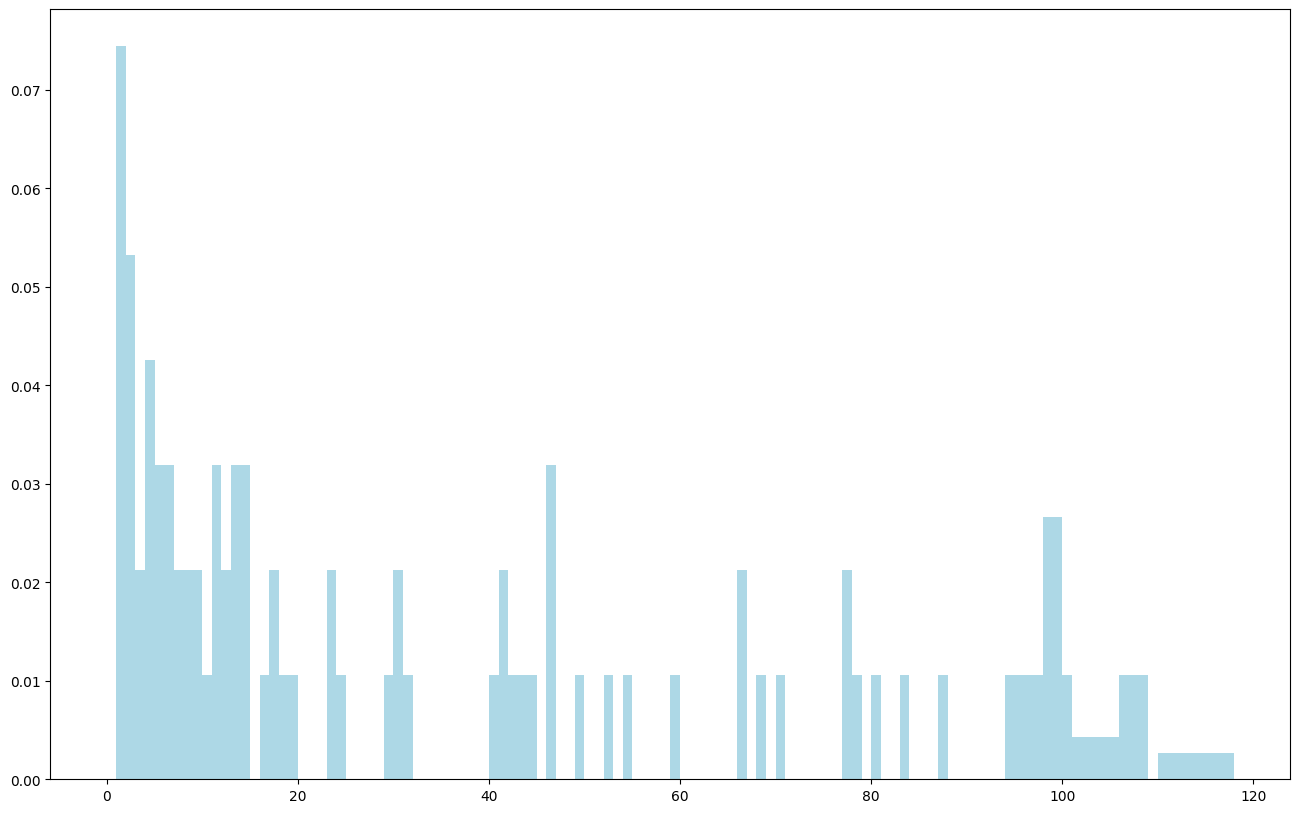

In [8]:
plt.hist(values, bins=bins, color='lightblue',density=True)
fig = plt.gcf()
fig.set_size_inches(16, 10)

In [9]:
ratings_data = sc.textFile("users.txt")
ratings_data.count()

116865

In [10]:
ratings_data.first()

'ur15298231,Lejink,rw1661208,tt0040761,7'

In [11]:
ratings_data = ratings_data.map(lambda x: x.split(","))
ratings_data.take(5)

[['ur15298231', 'Lejink', 'rw1661208', 'tt0040761', '7'],
 ['ur5760763', 'jack_bagley', 'rw1641320', 'tt0040761', '8'],
 ['ur2876087', 'ubercommando', 'rw1053916', 'tt0040761', '8'],
 ['ur3741220', 'tomgillespie2002', 'rw3018161', 'tt0040761', '7'],
 ['ur20552756', 'TheLittleSongbird', 'rw2204771', 'tt0040761', '7']]

In [12]:

ratings = ratings_data.map(lambda x: int(x[4]))

print("Ratings: ", ratings.take(10))


Ratings:  [7, 8, 8, 7, 7, 7, 10, 7, 8, 7]


In [13]:
avr_rating = ratings.reduce(lambda x, y: x + y) / ratings.count()
print("Average Rating: ", avr_rating)

Average Rating:  5.790869807042314


In [14]:
ratings_list = ratings.collect()
print("Ratings List: ", ratings_list)

Ratings List:  [7, 8, 8, 7, 7, 7, 10, 7, 8, 7, 10, 6, 4, 6, 7, 7, 8, 7, 8, 7, 8, 7, 1, 8, 8, 7, 7, 7, 7, 6, 8, 6, 5, 10, 6, 4, 6, 8, 8, 9, 10, 9, 8, 9, 5, 2, 3, 2, 7, 10, 7, 8, 8, 6, 7, 9, 6, 10, 7, 5, 9, 5, 9, 9, 1, 8, 5, 9, 9, 8, 8, 6, 6, 5, 2, 7, 1, 1, 3, 10, 1, 1, 8, 8, 8, 10, 8, 5, 5, 4, 4, 4, 8, 1, 1, 4, 1, 9, 1, 1, 1, 10, 8, 8, 10, 10, 8, 9, 8, 10, 9, 5, 5, 4, 4, 4, 8, 1, 1, 4, 1, 9, 1, 1, 1, 10, 8, 8, 10, 10, 8, 9, 8, 10, 9, 8, 7, 10, 10, 10, 1, 4, 5, 5, 6, 3, 1, 1, 7, 1, 6, 3, 8, 1, 4, 2, 3, 10, 8, 8, 8, 6, 8, 8, 7, 8, 7, 8, 9, 8, 8, 9, 10, 9, 10, 10, 7, 10, 7, 8, 4, 10, 8, 9, 1, 1, 3, 3, 5, 2, 3, 2, 1, 1, 1, 8, 7, 10, 8, 10, 6, 4, 5, 1, 1, 1, 7, 3, 6, 1, 8, 7, 5, 4, 1, 1, 7, 1, 5, 8, 10, 6, 8, 6, 7, 6, 7, 7, 9, 6, 5, 8, 7, 4, 6, 7, 6, 9, 3, 10, 10, 8, 8, 6, 6, 6, 5, 1, 3, 7, 5, 7, 1, 9, 6, 8, 2, 1, 2, 8, 8, 8, 10, 6, 10, 6, 10, 3, 10, 1, 10, 10, 10, 1, 10, 1, 10, 10, 10, 1, 10, 10, 10, 3, 1, 1, 2, 1, 6, 10, 7, 10, 10, 8, 10, 8, 7, 6, 7, 7, 10, 7, 3, 9, 1, 8, 7, 4, 7, 10, 7, 1

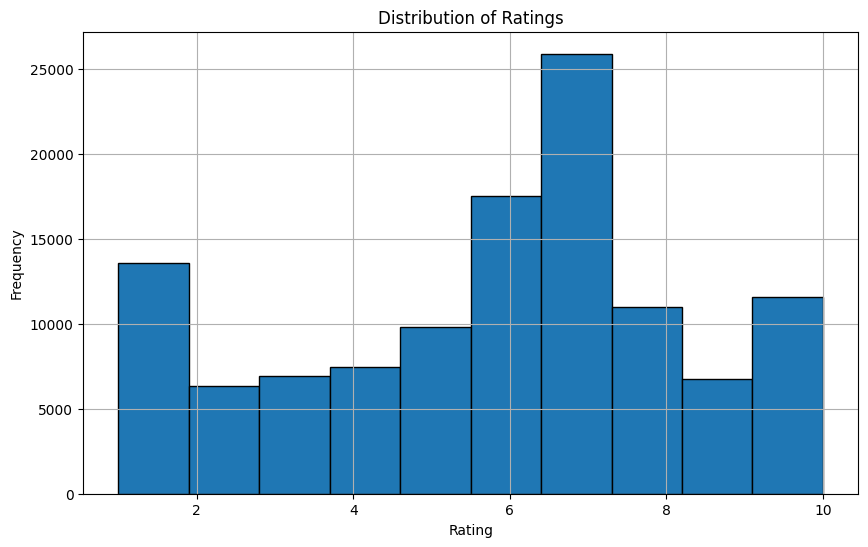

In [15]:
# Matplotlib ile histogram çiz
plt.figure(figsize=(10, 6))
plt.hist(ratings_list, bins=10, edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [16]:
data = spark.read.csv("dataset.csv", header=True, inferSchema=True)

In [17]:
data.show(5)

+---------+--------------------+--------------------+------------+-----------------+----------+---------+------+
| Movie ID|         Movie Title|               Genre|Release Year|        User Name|   User ID|Review ID|Rating|
+---------+--------------------+--------------------+------------+-----------------+----------+---------+------+
|tt0040761|Scott of the Anta...|['Action', 'Adven...|        1948|           Lejink|ur15298231|rw1661208|     7|
|tt0040761|Scott of the Anta...|['Action', 'Adven...|        1948|      jack_bagley| ur5760763|rw1641320|     8|
|tt0040761|Scott of the Anta...|['Action', 'Adven...|        1948|     ubercommando| ur2876087|rw1053916|     8|
|tt0040761|Scott of the Anta...|['Action', 'Adven...|        1948| tomgillespie2002| ur3741220|rw3018161|     7|
|tt0040761|Scott of the Anta...|['Action', 'Adven...|        1948|TheLittleSongbird|ur20552756|rw2204771|     7|
+---------+--------------------+--------------------+------------+-----------------+----------+-

In [18]:
groupby_data=data.groupBy("Movie ID")

In [19]:
from pyspark.sql.functions import col, desc


groupby_sorted_data=groupby_data.agg({"Rating":"mean"}).orderBy(desc("avg(Rating)"))
popular=groupby_sorted_data.groupBy("avg(Rating)").count()
popular=popular.orderBy(desc("avg(Rating)"))
popular.show(10)
groupby_sorted_data.show(10)

+-----------------+-----+
|      avg(Rating)|count|
+-----------------+-----+
|             10.0|   58|
|            9.875|    1|
|9.833333333333334|    1|
|              9.8|    1|
|             9.76|    1|
|             9.75|    2|
|9.666666666666666|    2|
|             9.65|    1|
|            9.625|    1|
| 9.61111111111111|    1|
+-----------------+-----+
only showing top 10 rows

+---------+-----------+
| Movie ID|avg(Rating)|
+---------+-----------+
|tt0262223|       10.0|
|tt2621382|       10.0|
|tt1130692|       10.0|
|tt0102706|       10.0|
|tt0495794|       10.0|
|tt3045742|       10.0|
|tt6150988|       10.0|
|tt1082075|       10.0|
|tt1319971|       10.0|
|tt0291760|       10.0|
+---------+-----------+
only showing top 10 rows



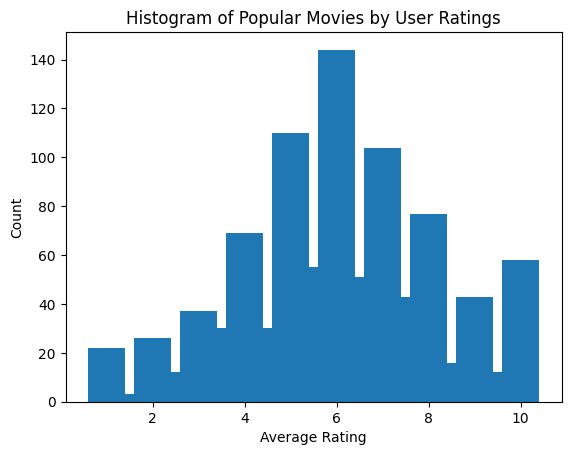

In [20]:
import matplotlib.pyplot as plt

# Extract the ratings and counts from the DataFrame
ratings = popular.select("avg(Rating)").rdd.flatMap(lambda x: x).collect()
counts = popular.select("count").rdd.flatMap(lambda x: x).collect()

# Plot the histogram
plt.bar(ratings, counts)
plt.xlabel("Average Rating")
plt.ylabel("Count")
plt.title("Histogram of Popular Movies by User Ratings")
plt.show()

In [21]:
from pyspark.sql.functions import create_map, lit
from itertools import chain

# Create mappings
movie_id_mapping = {id: idx for idx, id in enumerate(data.select('Movie ID').distinct().rdd.flatMap(lambda x: x).collect(), start=1)}
user_id_mapping = {id: idx for idx, id in enumerate(data.select('User ID').distinct().rdd.flatMap(lambda x: x).collect(), start=1)}

# Create map for replacement
mapping_expr_movie = create_map([lit(x) for x in chain(*movie_id_mapping.items())])
mapping_expr_user = create_map([lit(x) for x in chain(*user_id_mapping.items())])

# Apply mappings
data = data.withColumn('Movie ID', mapping_expr_movie.getItem(col('Movie ID')))
data = data.withColumn('User ID', mapping_expr_user.getItem(col('User ID')))

# Display the updated DataFrame
data.show(5)

+--------+--------------------+--------------------+------------+-----------------+-------+---------+------+
|Movie ID|         Movie Title|               Genre|Release Year|        User Name|User ID|Review ID|Rating|
+--------+--------------------+--------------------+------------+-----------------+-------+---------+------+
|    3594|Scott of the Anta...|['Action', 'Adven...|        1948|           Lejink|  36149|rw1661208|     7|
|    3594|Scott of the Anta...|['Action', 'Adven...|        1948|      jack_bagley|  24991|rw1641320|     8|
|    3594|Scott of the Anta...|['Action', 'Adven...|        1948|     ubercommando|  24189|rw1053916|     8|
|    3594|Scott of the Anta...|['Action', 'Adven...|        1948| tomgillespie2002|  32786|rw3018161|     7|
|    3594|Scott of the Anta...|['Action', 'Adven...|        1948|TheLittleSongbird|  53110|rw2204771|     7|
+--------+--------------------+--------------------+------------+-----------------+-------+---------+------+
only showing top 5 

In [22]:
from pyspark.ml.recommendation import ALS
from pyspark.ml.evaluation import RegressionEvaluator


# Split the data into train and test sets
train, test = data.randomSplit([0.7, 0.3], seed=5020) 

# Define ALS model
als = ALS(userCol="User ID", itemCol="Movie ID", ratingCol="Rating", coldStartStrategy="drop")

# Initialize evaluators
rmse_evaluator = RegressionEvaluator(metricName="rmse", labelCol="Rating", predictionCol="prediction")
mse_evaluator = RegressionEvaluator(metricName="mse", labelCol="Rating", predictionCol="prediction")

# Manually set and evaluate parameters
parameters = [
  {"rank": 10, "maxIter": 10, "lambda": 0.01},
    {"rank": 10, "maxIter": 10, "lambda": 0.1},
    {"rank": 50, "maxIter": 10, "lambda": 0.01},
    {"rank": 50, "maxIter": 10, "lambda": 0.1},
    {"rank": 200, "maxIter": 10, "lambda": 0.01},
    {"rank": 200, "maxIter": 10, "lambda": 0.1},

    {"rank": 10, "maxIter": 18, "lambda": 0.01},
    {"rank": 10, "maxIter": 18, "lambda": 0.1},
    {"rank": 50, "maxIter": 18, "lambda": 0.01},
    {"rank": 50, "maxIter": 18, "lambda": 0.1},
    {"rank": 200, "maxIter": 18, "lambda": 0.01},
    {"rank": 200, "maxIter": 18, "lambda": 0.1},

    {"rank": 10, "maxIter": 22, "lambda": 0.01},
    {"rank": 10, "maxIter": 22, "lambda": 0.1},
    {"rank": 50, "maxIter": 22, "lambda": 0.01},
    {"rank": 50, "maxIter": 22, "lambda": 0.1},
    {"rank": 200, "maxIter": 22, "lambda": 0.01},
    {"rank": 200, "maxIter": 22,"lambda": 0.1},
]

best_model = None
best_rmse = float("inf")
best_mse = float("inf")

for params in parameters:
    als.setParams(rank=params["rank"], maxIter=params["maxIter"], regParam=params["lambda"])
    model = als.fit(train)
    predictions = model.transform(test)
    rmse = rmse_evaluator.evaluate(predictions)
    mse = mse_evaluator.evaluate(predictions)
    print(f"Model with rank={params['rank']}, maxIter={params['maxIter']}, regParam={params['lambda']} has RMSE={rmse} and MSE={mse}")
    if rmse < best_rmse:
        best_model = model
        best_rmse = rmse
        best_mse = mse

print(f"Best model has RMSE={best_rmse} and MSE={best_mse}")

Model with rank=10, maxIter=10, regParam=0.01 has RMSE=5.7265474339966715 and MSE=32.79334551381387
Model with rank=10, maxIter=10, regParam=0.1 has RMSE=3.2426261961425906 and MSE=10.514624647910168
Model with rank=50, maxIter=10, regParam=0.01 has RMSE=4.1149012303641275 and MSE=16.932412135652207
Model with rank=50, maxIter=10, regParam=0.1 has RMSE=2.8117550130988795 and MSE=7.905966253686681
Model with rank=200, maxIter=10, regParam=0.01 has RMSE=3.5444080341442135 and MSE=12.562828312506044
Model with rank=200, maxIter=10, regParam=0.1 has RMSE=2.703467853857191 and MSE=7.3087384368392065
Model with rank=10, maxIter=18, regParam=0.01 has RMSE=4.817102934507528 and MSE=23.204480681641037
Model with rank=10, maxIter=18, regParam=0.1 has RMSE=2.6869259405802417 and MSE=7.219571010163016
Model with rank=50, maxIter=18, regParam=0.01 has RMSE=3.4879553233361484 and MSE=12.165832337588977
Model with rank=50, maxIter=18, regParam=0.1 has RMSE=2.4306964017362183 and MSE=5.9082849974134
M

In [23]:
# Make predictions
predictions = best_model.transform(test)

# Select the relevant columns for comparison
comparison = predictions.select("Rating", "prediction")

# Show side by side comparison
comparison.show()

+------+----------+
|Rating|prediction|
+------+----------+
|    10|  8.014239|
|     7|  4.296714|
|     5| 3.2842684|
|     7| 6.1905923|
|     7|  6.840557|
|     3|0.89396805|
|     5| 1.7764773|
|     2|  2.429907|
|     3|  2.645726|
|     6| 2.8806794|
|     6| 3.9297266|
|     1| 3.5780776|
|     7| 3.2389722|
|     4|  4.070185|
|     5|  3.954487|
|     6|   3.94688|
|     8|  6.518885|
|     7|  6.782092|
|     5|   5.80305|
|     8|  4.378284|
+------+----------+
only showing top 20 rows



In [24]:
import numpy as np
from pyspark.sql import SparkSession, functions as F


# Extract user and item factors
item_factors = best_model.itemFactors.select("id", "features").rdd.map(lambda x: (x.id, x.features)).collectAsMap()
user_factors = best_model.userFactors.select("id", "features").rdd.map(lambda x: (x.id, x.features)).collectAsMap()

# Function to calculate cosine similarity
def cosine_similarity(vector1, vector2):
    return np.dot(vector1, vector2) / (np.linalg.norm(vector1) * np.linalg.norm(vector2))

# Function to predict rating for a movie given by a user
def predict_rating(user_id, movie_id):
    user_features = user_factors[user_id]
    item_features = item_factors[movie_id]
    rating = np.dot(user_features, item_features)
    return np.clip(rating, 1, 10)

# Function to find top N users who would like a specific movie
def top_users_for_movie(movie_id, num_users=10):
    # Get features for the given movie
    movie_features = item_factors[movie_id]
    # Calculate cosine similarity between the given movie and all users
    user_similarities = [(user_id, cosine_similarity(user_features, movie_features)) for user_id, user_features in user_factors.items()]
    # Filter out users who have already rated this movie
    rated_users = set(data.filter(data["Movie ID"] == movie_id).select("User ID").rdd.flatMap(lambda x: x).collect())
    user_similarities = [(user_id, sim) for user_id, sim in user_similarities if user_id not in rated_users]
    # Get the top N users with highest similarity
    top_users = sorted(user_similarities, key=lambda x: -x[1])[:num_users]
    return top_users

# Function to find top N similar movies to a specific movie
def top_similar_movies(movie_id, num_movies=10):
    # Get features for the given movie
    movie_features = item_factors[movie_id]
    # Calculate cosine similarity between the given movie and all other movies
    movie_similarities = [(other_movie_id, cosine_similarity(other_movie_features, movie_features)) for other_movie_id, other_movie_features in item_factors.items() if other_movie_id != movie_id]
    # Get the top N movies with highest similarity
    top_movies = sorted(movie_similarities, key=lambda x: -x[1])[:num_movies]
    return top_movies

# Get the movie ID and name
movie_id = 3594  # Replace with the actual movie ID
movie_name = data.select("Movie Title").where(data["Movie ID"] == movie_id).select(F.first("Movie Title")).collect()[0][0]

# Find and print top 10 similar movies
similar_movies = top_similar_movies(movie_id)
print(f"Top similar movies to '{movie_name}':")
for sim_movie_id, similarity in similar_movies:
    sim_movie_name = data.select("Movie Title").where(data["Movie ID"] == sim_movie_id).select(F.first("Movie Title")).collect()[0][0]
    print(f"Movie Name: {sim_movie_name}, Movie ID: {sim_movie_id}, Similarity: {similarity:.4f}")

# Find and print top 10 users who would like a specific movie and predict their ratings
top_users = top_users_for_movie(movie_id)
print(f"\nTop 10 users who would like the movie '{movie_name}':")
for user_id, similarity in top_users:
    user_name = data.filter(data["User ID"] == user_id).select("User Name").distinct().collect()[0][0]
    rating_prediction = predict_rating(user_id, movie_id)
    print(f"User Name: {user_name}, User ID: {user_id}, Predicted Rating: {rating_prediction:.2f}")

Top similar movies to 'Scott of the Antarctic':
Movie Name: Behzat Ç. Ankara Yaniyor, Movie ID: 1450, Similarity: 0.9800
Movie Name: The Cockleshell Heroes, Movie ID: 2396, Similarity: 0.9422
Movie Name: We Dive at Dawn, Movie ID: 1446, Similarity: 0.9219
Movie Name: The Charge at Feather River, Movie ID: 1861, Similarity: 0.9158
Movie Name: The Moonraker, Movie ID: 4981, Similarity: 0.9157
Movie Name: The World Is Not Enough, Movie ID: 1193, Similarity: 0.9155
Movie Name: Into the Blue, Movie ID: 1385, Similarity: 0.9151
Movie Name: In the Line of Fire, Movie ID: 6166, Similarity: 0.9145
Movie Name: The Heroes of Telemark, Movie ID: 2850, Similarity: 0.9133
Movie Name: Watchmen, Movie ID: 724, Similarity: 0.9130

Top 10 users who would like the movie 'Scott of the Antarctic':
User Name: skyway3131, User ID: 40457, Predicted Rating: 6.55
User Name: kbuc263924, User ID: 21330, Predicted Rating: 7.93
User Name: tassies, User ID: 30525, Predicted Rating: 7.93
User Name: SPaS, User ID: 320

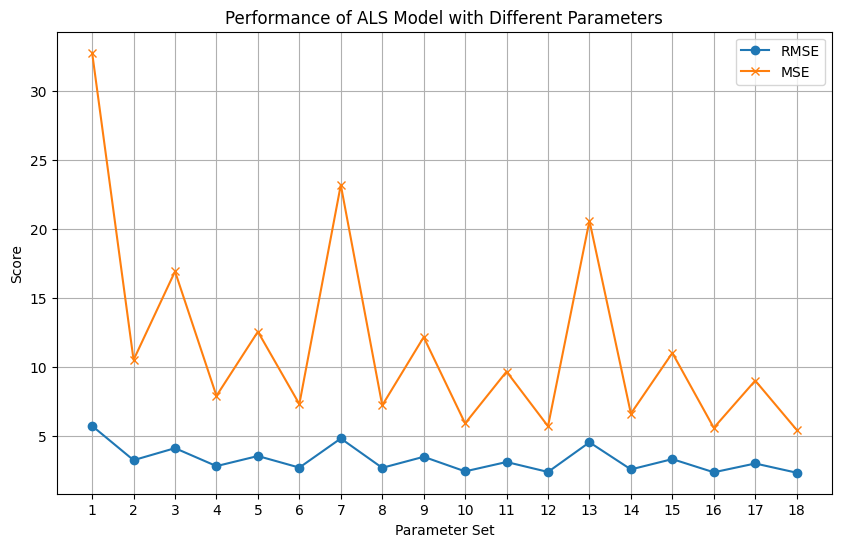

In [25]:
import matplotlib.pyplot as plt

# Different ALS parameter values
parameters = [
    {"rank": 10, "maxIter": 10, "regParam": 0.01},
    {"rank": 10, "maxIter": 10, "regParam": 0.1},
    {"rank": 50, "maxIter": 10, "regParam": 0.01},
    {"rank": 50, "maxIter": 10, "regParam": 0.1},
    {"rank": 200, "maxIter": 10, "regParam": 0.01},
    {"rank": 200, "maxIter": 10, "regParam": 0.1},

    {"rank": 10, "maxIter": 18, "regParam": 0.01},
    {"rank": 10, "maxIter": 18, "regParam": 0.1},
    {"rank": 50, "maxIter": 18, "regParam": 0.01},
    {"rank": 50, "maxIter": 18, "regParam": 0.1},
    {"rank": 200, "maxIter": 18, "regParam": 0.01},
    {"rank": 200, "maxIter": 18, "regParam": 0.1},

    {"rank": 10, "maxIter": 22, "regParam": 0.01},
    {"rank": 10, "maxIter": 22, "regParam": 0.1},
    {"rank": 50, "maxIter": 22, "regParam": 0.01},
    {"rank": 50, "maxIter": 22, "regParam": 0.1},
    {"rank": 200, "maxIter": 22, "regParam": 0.01},
    {"rank": 200, "maxIter": 22, "regParam": 0.1},
]

# Empty lists to store RMSE and MSE values
rmse_values = []
mse_values = []

# Train models and calculate performance metrics
for params in parameters:
    als.setParams(rank=params["rank"], maxIter=params["maxIter"], regParam=params["regParam"])
    model = als.fit(train)
    predictions = model.transform(test)
    rmse = rmse_evaluator.evaluate(predictions)
    mse = mse_evaluator.evaluate(predictions)
    rmse_values.append(rmse)
    mse_values.append(mse)

# Visualization for different parameter sets
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(parameters) + 1), rmse_values, marker='o', label='RMSE')
plt.plot(range(1, len(parameters) + 1), mse_values, marker='x', label='MSE')
plt.title('Performance of ALS Model with Different Parameters')
plt.xlabel('Parameter Set')
plt.ylabel('Score')
plt.xticks(range(1, len(parameters) + 1))
plt.legend()
plt.grid(True)
plt.show()
